##Dependencias



In [2]:
!pip install -q transformers torch bertopic[visualization] umap-learn hdbscan gensim scikit-learn
!pip install -q accelerate
!pip install spacy
!pip install bertopic sentence-transformers umap-learn hdbscan gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.0 MB/s eta 0:00:00


##Imports

In [4]:
import os
import glob
import pandas as pd
import numpy as np
import torch
from torch.nn import functional as F
from transformers import AutoTokenizer, AutoModel
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings('ignore')

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
# KeyBert
try:
    from bertopic.representation import KeyBERTInspired
    KEYBERT_AVAILABLE = True
except ImportError:
    print("KeyBERT no está disponible. Instala: pip install keybert")
    KEYBERT_AVAILABLE = False

Mounted at /content/drive


##KeyBert + Re-ranking

Este código carga los documentos necesarios y prueba varios modelos basados en trasformers para analizar cual es el mejor para nuestra tarea, analizando también si los modelos funcionan mejor con re-ranking o no.

Encontrados 104 archivos
✓ Documentos cargados: 104
 TOPIC MODELLING CON TRANSFORMERS Y RE-RANKING
 GPU disponible: Tesla T4
   Memoria: 15.8 GB
 KeyBERT: Disponible para re-ranking ✓

 FASE 1: SIN RE-RANKING
 Directorio de resultados: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306
 KeyBERT re-ranking: Desactivado

 PROBANDO MODELO: BETO-cased
 KeyBERT: NO

 INICIANDO: BETO-cased
 Model: dccuchile/bert-base-spanish-wwm-cased
 KeyBERT Re-ranking: False

 Generando embeddings con: BETO-cased (dccuchile/bert-base-spanish-wwm-cased)
   Pooling method: cls
   Usando dispositivo: cuda


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


   Procesados 8/104 documentos
   Procesados 88/104 documentos


2026-01-14 21:13:11,112 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:13:11,325 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:13:11,327 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:13:11,337 - BERTopic - Cluster - Completed ✓
2026-01-14 21:13:11,340 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:13:12,623 - BERTopic - Representation - Completed ✓


 Calculando métricas...


2026-01-14 21:13:15,465 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 Guardando resultados...
 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/BETO-cased/bertopic_model

 BETO-cased - COMPLETADO
   • Tópicos: 2
   • Ruido: 1.0%
   • Coherencia C_v: 0.6380
   • Score: 0.5723
   • KeyBERT: ✗
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/BETO-cased

 PROBANDO MODELO: BETO-uncased
 KeyBERT: NO

 INICIANDO: BETO-uncased
 Model: dccuchile/bert-base-spanish-wwm-uncased
 KeyBERT Re-ranking: False

 Generando embeddings con: BETO-uncased (dccuchile/bert-base-spanish-wwm-uncased)
   Pooling method: mean
   Usando dispositivo: cuda


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


   Procesados 8/104 documentos
   Procesados 88/104 documentos


2026-01-14 21:13:20,860 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:13:21,070 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:13:21,070 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:13:21,080 - BERTopic - Cluster - Completed ✓
2026-01-14 21:13:21,083 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:13:22,400 - BERTopic - Representation - Completed ✓


 Calculando métricas...


2026-01-14 21:13:24,495 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 Guardando resultados...
 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/BETO-uncased/bertopic_model

 BETO-uncased - COMPLETADO
   • Tópicos: 2
   • Ruido: 10.6%
   • Coherencia C_v: 0.5374
   • Score: 0.5032
   • KeyBERT: ✗
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/BETO-uncased

 PROBANDO MODELO: XLM-RoBERTa-base
 KeyBERT: NO

 INICIANDO: XLM-RoBERTa-base
 Model: xlm-roberta-base
 KeyBERT Re-ranking: False

 Generando embeddings con: XLM-RoBERTa-base (xlm-roberta-base)
   Pooling method: mean
   Usando dispositivo: cuda
   Procesados 8/104 documentos
   Procesados 88/104 documentos


2026-01-14 21:13:31,522 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:13:31,820 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:13:31,822 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:13:31,837 - BERTopic - Cluster - Completed ✓
2026-01-14 21:13:31,841 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:13:33,559 - BERTopic - Representation - Completed ✓


 Calculando métricas...
 Guardando resultados...
 Generando visualizaciones...


2026-01-14 21:13:36,221 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/XLM-RoBERTa-base/bertopic_model

 XLM-RoBERTa-base - COMPLETADO
   • Tópicos: 3
   • Ruido: 8.7%
   • Coherencia C_v: 0.5402
   • Score: 0.5201
   • KeyBERT: ✗
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/XLM-RoBERTa-base

 PROBANDO MODELO: mDeBERTa-v3
 KeyBERT: NO

 INICIANDO: mDeBERTa-v3
 Model: microsoft/mdeberta-v3-base
 KeyBERT Re-ranking: False

 Generando embeddings con: mDeBERTa-v3 (microsoft/mdeberta-v3-base)
   Pooling method: mean
   Usando dispositivo: cuda
   Procesados 8/104 documentos
   Procesados 88/104 documentos


2026-01-14 21:13:46,942 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:13:47,151 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:13:47,152 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:13:47,162 - BERTopic - Cluster - Completed ✓
2026-01-14 21:13:47,165 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:13:48,451 - BERTopic - Representation - Completed ✓


 Calculando métricas...


2026-01-14 21:13:50,768 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 Guardando resultados...
 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/mDeBERTa-v3/bertopic_model

 mDeBERTa-v3 - COMPLETADO
   • Tópicos: 2
   • Ruido: 1.9%
   • Coherencia C_v: 0.4629
   • Score: 0.4994
   • KeyBERT: ✗
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_20260114_211306/mDeBERTa-v3

 FASE 2: CON RE-RANKING (KeyBERTInspired)
 Directorio de resultados: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350
 KeyBERT re-ranking: Activado

 PROBANDO MODELO: BETO-cased
 KeyBERT: SÍ

 INICIANDO: BETO-cased
 Model: dccuchile/bert-base-spanish-wwm-cased
 KeyBERT Re-ranking: True

 Generando embeddings con: BETO-cased (dccuchile/bert-base-spanish-wwm-cased)
   Pooling method: cls
   Usando dispositivo: cuda


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


   Procesados 8/104 documentos
   Procesados 88/104 documentos


2026-01-14 21:13:55,747 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:13:55,956 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:13:55,957 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:13:55,966 - BERTopic - Cluster - Completed ✓
2026-01-14 21:13:55,970 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:13:57,938 - BERTopic - Representation - Completed ✓



 Aplicando KeyBERT re-ranking posterior...


2026-01-14 21:14:05,255 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Re-ranking aplicado exitosamente
 Calculando métricas...
 Guardando resultados...
 ✓ Palabras clave detalladas guardadas
 Generando visualizaciones...


2026-01-14 21:14:14,170 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/BETO-cased/bertopic_model

 BETO-cased - COMPLETADO
   • Tópicos: 3
   • Ruido: 1.0%
   • Coherencia C_v: 0.3450
   • Calidad keywords: 0.4127
   • Score: 0.5064
   • KeyBERT: ✓
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/BETO-cased

 Ejemplo de tópicos re-rankeados:
   Tópico 0: estés, tranquilo, hacerte, conversación, emprender
   Tópico 1: cuestiona, aceptar, ideológico, consideran, resto mundo
   Tópico 2: amigos oyentes, oyentes colectivo, sur global, programa debate, derecha catalana

 PROBANDO MODELO: BETO-uncased
 KeyBERT: SÍ

 INICIANDO: BETO-uncased
 Model: dccuchile/bert-base-spanish-wwm-uncased
 KeyBERT Re-ranking: True

 Generando embeddings con: BETO-uncased (dccuchile/bert-base-spanish-wwm-uncased)
   Pooling method: mean
   Usando dispositivo: cuda


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


   Procesados 8/104 documentos
   Procesados 88/104 documentos


2026-01-14 21:14:19,063 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:14:19,275 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:14:19,276 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:14:19,286 - BERTopic - Cluster - Completed ✓
2026-01-14 21:14:19,289 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:14:20,601 - BERTopic - Representation - Completed ✓



 Aplicando KeyBERT re-ranking posterior...


2026-01-14 21:14:30,882 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Re-ranking aplicado exitosamente
 Calculando métricas...
 Guardando resultados...
 ✓ Palabras clave detalladas guardadas
 Generando visualizaciones...


2026-01-14 21:14:36,940 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/BETO-uncased/bertopic_model

 BETO-uncased - COMPLETADO
   • Tópicos: 3
   • Ruido: 10.6%
   • Coherencia C_v: 0.3450
   • Calidad keywords: 0.4127
   • Score: 0.4775
   • KeyBERT: ✓
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/BETO-uncased

 Ejemplo de tópicos re-rankeados:
   Tópico 0: estés, tranquilo, hacerte, conversación, emprender
   Tópico 1: cuestiona, aceptar, ideológico, consideran, resto mundo
   Tópico 2: amigos oyentes, oyentes colectivo, sur global, programa debate, derecha catalana

 PROBANDO MODELO: XLM-RoBERTa-base
 KeyBERT: SÍ

 INICIANDO: XLM-RoBERTa-base
 Model: xlm-roberta-base
 KeyBERT Re-ranking: True

 Generando embeddings con: XLM-RoBERTa-base (xlm-roberta-base)
   Pooling method: mean
   Usando dispositivo: cuda
   Procesados 8/104 documentos
   Procesad

2026-01-14 21:14:43,968 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:14:44,181 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:14:44,184 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:14:44,194 - BERTopic - Cluster - Completed ✓
2026-01-14 21:14:44,197 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:14:45,498 - BERTopic - Representation - Completed ✓



 Aplicando KeyBERT re-ranking posterior...


2026-01-14 21:14:54,325 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Re-ranking aplicado exitosamente
 Calculando métricas...
 Guardando resultados...
 ✓ Palabras clave detalladas guardadas
 Generando visualizaciones...


2026-01-14 21:14:59,087 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/XLM-RoBERTa-base/bertopic_model

 XLM-RoBERTa-base - COMPLETADO
   • Tópicos: 3
   • Ruido: 8.7%
   • Coherencia C_v: 0.3450
   • Calidad keywords: 0.4127
   • Score: 0.4833
   • KeyBERT: ✓
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/XLM-RoBERTa-base

 Ejemplo de tópicos re-rankeados:
   Tópico 0: estés, tranquilo, hacerte, conversación, emprender
   Tópico 1: cuestiona, aceptar, ideológico, consideran, resto mundo
   Tópico 2: amigos oyentes, oyentes colectivo, sur global, programa debate, derecha catalana

 PROBANDO MODELO: mDeBERTa-v3
 KeyBERT: SÍ

 INICIANDO: mDeBERTa-v3
 Model: microsoft/mdeberta-v3-base
 KeyBERT Re-ranking: True

 Generando embeddings con: mDeBERTa-v3 (microsoft/mdeberta-v3-base)
   Pooling method: mean
   Usando dispositivo: cuda
   Procesados 8/104 docume

2026-01-14 21:15:11,045 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


   ✓ Embeddings generados: (104, 768)

 Creando modelo BERTopic...
 Entrenando modelo...


2026-01-14 21:15:11,260 - BERTopic - Dimensionality - Completed ✓
2026-01-14 21:15:11,262 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-14 21:15:11,275 - BERTopic - Cluster - Completed ✓
2026-01-14 21:15:11,278 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-14 21:15:12,710 - BERTopic - Representation - Completed ✓



 Aplicando KeyBERT re-ranking posterior...


2026-01-14 21:15:21,145 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Re-ranking aplicado exitosamente
 Calculando métricas...
 Guardando resultados...
 ✓ Palabras clave detalladas guardadas
 Generando visualizaciones...


2026-01-14 21:15:25,943 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


 ✓ Modelo guardado en: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/mDeBERTa-v3/bertopic_model

 mDeBERTa-v3 - COMPLETADO
   • Tópicos: 3
   • Ruido: 1.9%
   • Coherencia C_v: 0.3450
   • Calidad keywords: 0.4127
   • Score: 0.5035
   • KeyBERT: ✓
   • Directorio: /content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling_keybert_20260114_211350/mDeBERTa-v3

 Ejemplo de tópicos re-rankeados:
   Tópico 0: estés, tranquilo, hacerte, conversación, emprender
   Tópico 1: cuestiona, aceptar, ideológico, consideran, resto mundo
   Tópico 2: amigos oyentes, oyentes colectivo, sur global, programa debate, derecha catalana

 COMPARACIÓN: CON vs SIN RE-RANKING

Tabla comparativa:
          Modelo      Config  Tópicos Coherencia  Ruido  Score Calidad_Keywords
      BETO-cased Sin KeyBERT        2     0.6380  0.96% 0.5723              NaN
    BETO-uncased Sin KeyBERT        2     0.5374 10.58% 0.5032             

<Figure size 1200x600 with 0 Axes>

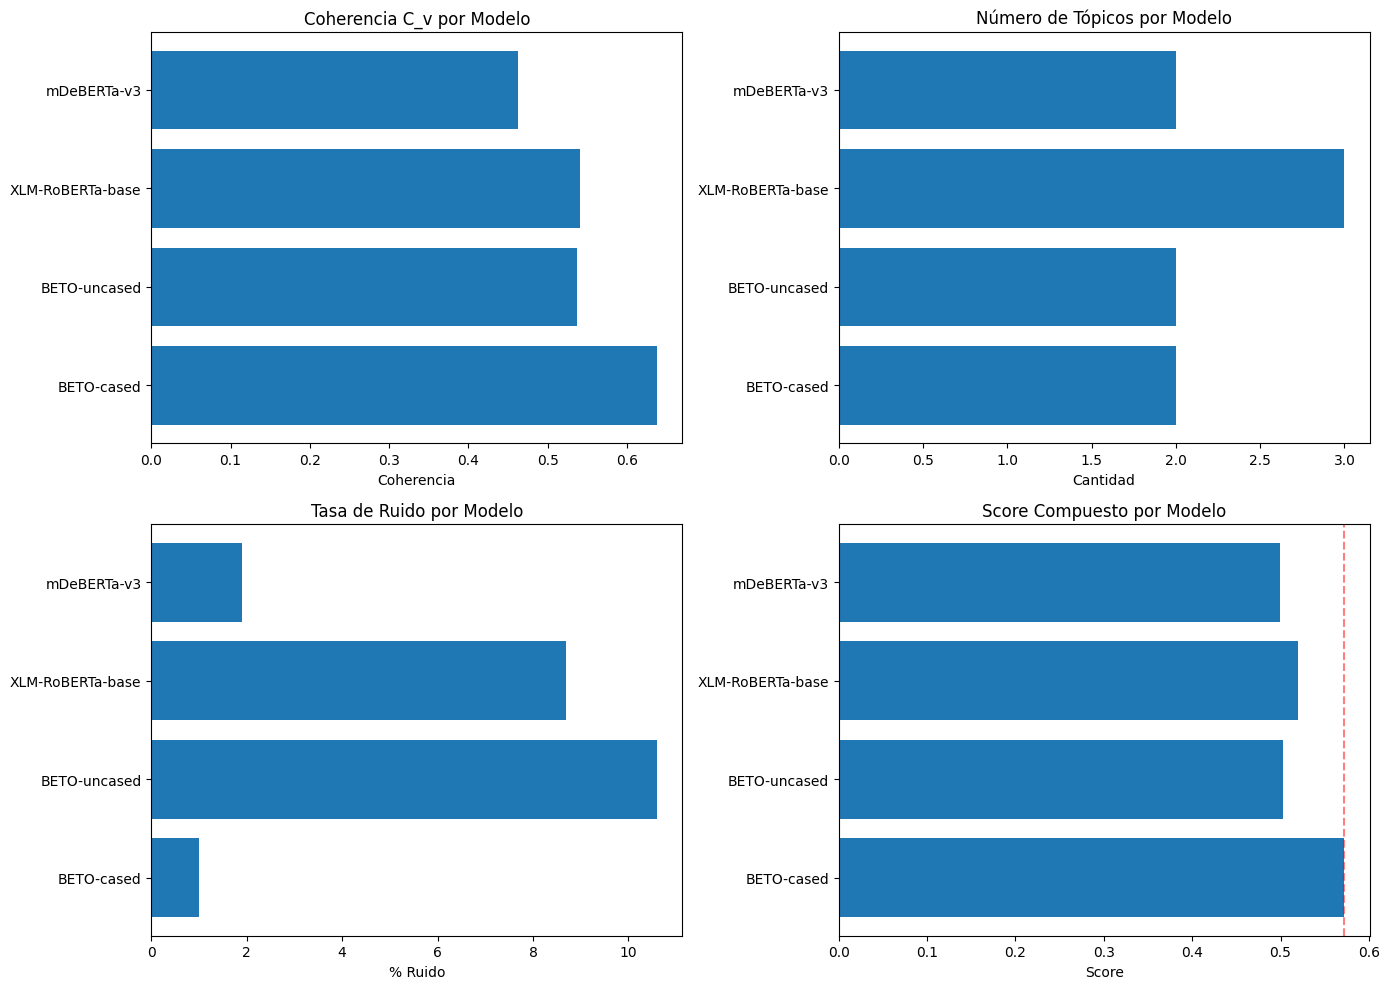


 EXPLORANDO TÓPICOS DEL MEJOR MODELO: BETO-cased

 DISTRIBUCIÓN DE TÓPICOS:
 Topic  Count                                Name
    -1      1 -1_raza_racismo_delinquir_xenofobia
     0     63  0_unidos_derecha_partido_izquierda
     1     40         1_dinero_euros_youtube_plan

  PALABRAS CLAVE POR TÓPICO:

Tópico 0 (63 docs, 60.6%):
  unidos, derecha, partido, izquierda, europea, unión, unión europea

Tópico 1 (40 docs, 38.5%):
  dinero, euros, youtube, plan, mes, oye, súper

 EJEMPLOS DE DOCUMENTOS POR TÓPICO:

 Tópico 0 - 63 documentos:
  • ABOGADOS TUMBAN los BULOS sobre EXTRANJERÍA: bienvenidos programa ampliando debate decidido grabar verano sabéis sagrada costumbre verano trabaja vago funcionario viendo gravedad hechos gravedad ...
  • ARANCELES_ TRUMP REVIENTA SU PROPIA BOLSA: hablar terremoto sufrido semana nivel político económico anuncio administración trump imposición aranceles país mundo entero directamente sitios vive ...

 Tópico 1 - 40 documentos:
  • 11 Hábitos Diario

<Figure size 1200x600 with 0 Axes>

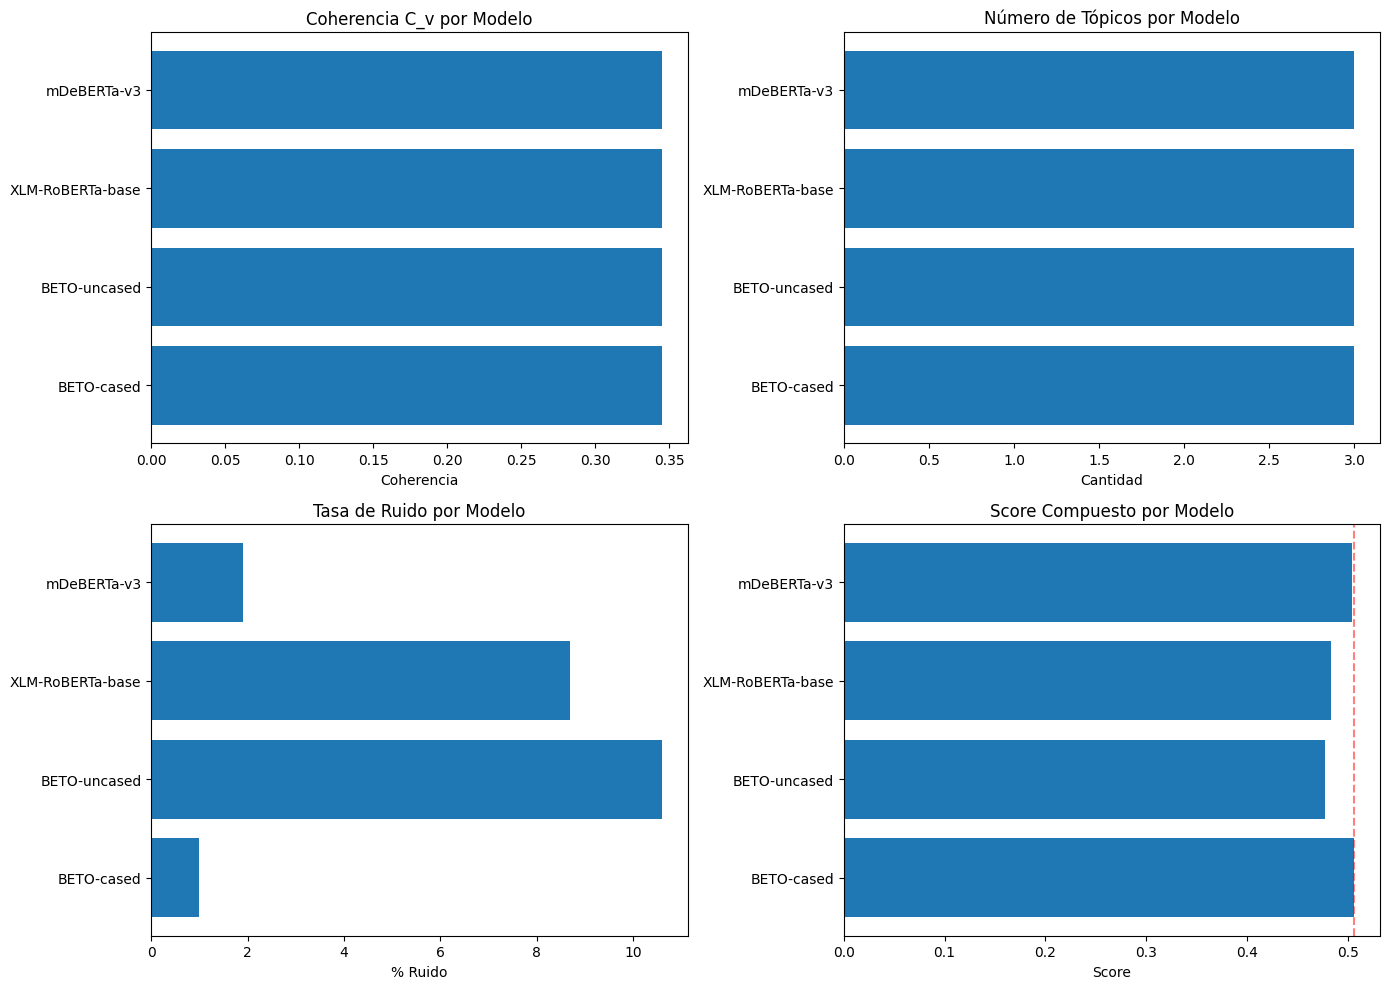


 EXPLORANDO TÓPICOS DEL MEJOR MODELO: BETO-cased

 DISTRIBUCIÓN DE TÓPICOS:
 Topic  Count                                                          Name
    -1     12                        -1_creemos_antonio turiel_cena_dedicar
     0     45                        0_estés_tranquilo_hacerte_conversación
     1     33                     1_cuestiona_aceptar_ideológico_consideran
     2     14 2_amigos oyentes_oyentes colectivo_sur global_programa debate

  PALABRAS CLAVE POR TÓPICO:
  (con KeyBERT re-ranking)

Tópico 0 (45 docs, 43.3%):
  estés, tranquilo, hacerte, conversación, emprender, dejé, sentir

Tópico 1 (33 docs, 31.7%):
  cuestiona, aceptar, ideológico, consideran, resto mundo, senegal, culturales

Tópico 2 (14 docs, 13.5%):
  amigos oyentes, oyentes colectivo, sur global, programa debate, derecha catalana, mordaza, derecha española

 EJEMPLOS DE DOCUMENTOS POR TÓPICO:

 Tópico 0 - 63 documentos:
  • ABOGADOS TUMBAN los BULOS sobre EXTRANJERÍA: bienvenidos programa ampliando 

In [10]:
# =============================================
# 1) CARGAR DOCUMENTOS
# =============================================
INPUT_DIR = "/content/drive/Shareddrives/NLP/entrega2_preprocessing+embeddings/preprocessing_steps"
pattern = "__clean_raw.txt"

paths = sorted(glob.glob(os.path.join(INPUT_DIR, f"*{pattern}")))
print(f"Encontrados {len(paths)} archivos")

docs, doc_names = [], []
for p in paths:
    with open(p, "r", encoding="utf-8") as f:
        text = f.read().strip()
        if len(text) > 10:
            docs.append(text)
            doc_names.append(os.path.basename(p).replace(pattern, "").rstrip("_"))

print(f"✓ Documentos cargados: {len(docs)}")
if len(docs) == 0:
    raise ValueError("No hay documentos para procesar")

# =============================================
# 2) MODELOS TRANSFORMERS A PROBAR
# =============================================
TRANSFORMER_MODELS = [
    {
        "name": "BETO-cased",
        "model_id": "dccuchile/bert-base-spanish-wwm-cased",
        "pooling": "cls"
    },
    {
        "name": "BETO-uncased",
        "model_id": "dccuchile/bert-base-spanish-wwm-uncased",
        "pooling": "mean"
    },
    {
        "name": "XLM-RoBERTa-base",
        "model_id": "xlm-roberta-base",
        "pooling": "mean"
    },
    {
        "name": "mDeBERTa-v3",
        "model_id": "microsoft/mdeberta-v3-base",
        "pooling": "mean"
    }
]

# =============================================
# 3) FUNCIÓN PARA EMBEDDINGS CON TRANSFORMERS
# =============================================
def get_bert_embeddings(model_info, texts, batch_size=8, max_length=512):
    """
    Obtiene embeddings usando transformers directamente
    """
    model_name = model_info["name"]
    model_id = model_info["model_id"]
    pooling = model_info.get("pooling", "mean")

    print(f"\n Generando embeddings con: {model_name} ({model_id})")
    print(f"   Pooling method: {pooling}")

    # Configurar dispositivo
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"   Usando dispositivo: {device}")

    # Cargar tokenizer y modelo
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModel.from_pretrained(model_id).to(device)
    model.eval()

    all_embeddings = []

    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i+batch_size]

            # Tokenizar
            inputs = tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                max_length=max_length,
                return_tensors="pt"
            ).to(device)

            # Obtener outputs del modelo
            outputs = model(**inputs)
            last_hidden_state = outputs.last_hidden_state

            # Aplicar pooling
            if pooling == "cls":
                # Usar el token [CLS]
                batch_embeddings = last_hidden_state[:, 0, :]
            elif pooling == "mean":
                # Promedio de todos los tokens (excluyendo padding)
                attention_mask = inputs['attention_mask']
                input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
                sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
                sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
                batch_embeddings = sum_embeddings / sum_mask
            elif pooling == "max":
                # Max pooling
                attention_mask = inputs['attention_mask']
                input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
                last_hidden_state[input_mask_expanded == 0] = -1e9
                batch_embeddings = torch.max(last_hidden_state, 1)[0]

            # Normalizar embeddings (cosine similarity)
            batch_embeddings = F.normalize(batch_embeddings, p=2, dim=1)

            all_embeddings.append(batch_embeddings.cpu().numpy())

            if (i // batch_size) % 10 == 0:
                print(f"   Procesados {min(i+batch_size, len(texts))}/{len(texts)} documentos")

    embeddings = np.vstack(all_embeddings)
    print(f"   ✓ Embeddings generados: {embeddings.shape}")

    return embeddings

# =============================================
# FUNCIÓN AUXILIAR PARA APLICAR RE-RANKING POSTERIOR
# =============================================
def apply_keybert_reranking_post(topic_model, docs, embeddings, model_dir, model_name):
    """
    Aplica KeyBERT re-ranking después de entrenar el modelo
    Esto evita el problema con embedding_model cuando se pasan embeddings precalculados
    """
    if not KEYBERT_AVAILABLE:
        print(" KeyBERT no disponible para re-ranking posterior")
        return topic_model, False, None

    try:
        print("\n Aplicando KeyBERT re-ranking posterior...")

        # 1. Crear un modelo BERTopic nuevo con KeyBERT
        # Necesitamos usar un SentenceTransformer ligero compatible
        from sentence_transformers import SentenceTransformer

        # Usar un modelo multilingüe pequeño para eficiencia
        keybert_embedder = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

        # 2. Configurar KeyBERTInspired
        keybert_repr = KeyBERTInspired(
            top_n_words=12,
            nr_repr_docs=5,
            random_state=42
        )

        # 3. Crear nuevo modelo BERTopic con KeyBERT
        topic_model_reranked = BERTopic(
            embedding_model=keybert_embedder,  # ¡IMPORTANTE!
            umap_model=topic_model.umap_model,
            hdbscan_model=topic_model.hdbscan_model,
            vectorizer_model=topic_model.vectorizer_model,
            representation_model=keybert_repr,
            language="spanish",
            calculate_probabilities=True,
            verbose=False
        )

        # 4. Entrenar el nuevo modelo con los mismos datos
        # ¡NO pasamos embeddings aquí! Dejamos que el modelo los genere
        topics_reranked, probs_reranked = topic_model_reranked.fit_transform(docs)

        # 5. Crear directorio para resultados re-rankeados
        rerank_dir = os.path.join(model_dir, "keybert_reranked")
        os.makedirs(rerank_dir, exist_ok=True)

        # 6. Guardar resultados
        topic_info_reranked = topic_model_reranked.get_topic_info()
        topic_info_reranked.to_csv(os.path.join(rerank_dir, "topics_info_reranked.csv"), index=False)

        # Guardar palabras clave detalladas
        valid_topics = [t for t in topic_info_reranked["Topic"] if t != -1]
        keyword_details = []

        for topic_id in valid_topics:
            words_info = topic_model_reranked.get_topic(topic_id)
            for rank, (word, score) in enumerate(words_info[:10]):
                keyword_details.append({
                    "topic": topic_id,
                    "rank": rank + 1,
                    "word": word,
                    "score": score,
                    "reranked": True
                })

        pd.DataFrame(keyword_details).to_csv(
            os.path.join(rerank_dir, "keywords_reranked.csv"), index=False
        )

        # Guardar el modelo
        topic_model_reranked.save(os.path.join(rerank_dir, "bertopic_model_reranked"))

        print(" ✓ Re-ranking aplicado exitosamente")

        # Calcular calidad de keywords
        keyword_quality = np.nan
        if valid_topics:
            try:
                topic_scores = []
                for topic_id in valid_topics:
                    words_info = topic_model_reranked.get_topic(topic_id)
                    if words_info and len(words_info) >= 3:
                        scores = [score for _, score in words_info[:5]]
                        avg_score = np.mean(scores)
                        topic_scores.append(avg_score)

                if topic_scores:
                    keyword_quality = np.mean(topic_scores)
            except:
                pass

        return topic_model_reranked, True, keyword_quality

    except Exception as e:
        print(f" Error en re-ranking posterior: {e}")
        import traceback
        traceback.print_exc()
        return topic_model, False, np.nan

# =============================================
# 4) FUNCIÓN PARA TOPIC MODELING CON TRANSFORMERS
# =============================================
def run_transformer_topic_modeling(model_info, docs, doc_names, output_dir, use_keybert=True):
    """
    Ejecuta topic modeling completo con un modelo transformer
    Opcional: aplica re-ranking con KeyBERTInspired (después del entrenamiento)
    """
    print(f"\n{'='*80}")
    print(f" INICIANDO: {model_info['name']}")
    print(f" Model: {model_info['model_id']}")
    print(f" KeyBERT Re-ranking: {use_keybert}")
    print(f"{'='*80}")

    # Crear directorio para resultados
    model_dir = os.path.join(output_dir, model_info["name"].replace("/", "_"))
    os.makedirs(model_dir, exist_ok=True)

    # 1. Obtener embeddings con transformers
    try:
        embeddings = get_bert_embeddings(model_info, docs)
    except Exception as e:
        print(f" Error obteniendo embeddings: {e}")
        return None

    # 2. Configurar UMAP
    umap_model = UMAP(
        n_neighbors=15,
        n_components=10,
        min_dist=0.1,
        metric="cosine",
        random_state=42
    )

    # 3. Configurar HDBSCAN
    hdbscan_model = HDBSCAN(
        min_cluster_size=10,
        min_samples=3,
        metric="euclidean",
        cluster_selection_method="eom",
        prediction_data=True
    )

    # 4. Configurar vectorizador
    vectorizer_model = CountVectorizer(
        ngram_range=(1, 2),
        lowercase=True,
        token_pattern=r"(?u)\b\w{3,}\b",  # Solo palabras de 3+ caracteres
        max_df=0.95,
        min_df=2,
        max_features=5000
    )

    # 5. Crear y entrenar BERTopic (SIN KeyBERT inicialmente)
    print("\n Creando modelo BERTopic...")

    topic_model = BERTopic(
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        vectorizer_model=vectorizer_model,
        language="spanish",
        calculate_probabilities=True,
        verbose=True
    )

    print(" Entrenando modelo...")
    topics, probabilities = topic_model.fit_transform(docs, embeddings)

    # 6. APLICAR RE-RANKING CON KeyBERT (si está solicitado)
    keyword_quality = np.nan
    if use_keybert and KEYBERT_AVAILABLE:
        topic_model, rerank_success, keyword_quality = apply_keybert_reranking_post(
            topic_model, docs, embeddings, model_dir, model_info["name"]
        )
        use_keybert = rerank_success
    elif use_keybert and not KEYBERT_AVAILABLE:
        print(" KeyBERT no disponible. Continuando sin re-ranking...")
        use_keybert = False

    # 7. Calcular métricas (usar el modelo actual, sea re-rankeado o no)
    print(" Calculando métricas...")

    topic_info = topic_model.get_topic_info()
    valid_topics = [t for t in topic_info["Topic"] if t != -1]
    num_topics = len(valid_topics)
    noise_count = sum(1 for t in topics if t == -1)
    noise_rate = noise_count / len(topics)

    if num_topics > 0:
        texts_for_coherence = [doc.split() for doc in docs]
        dictionary = Dictionary(texts_for_coherence)

        topics_words = []
        for topic_id in valid_topics:
            words = [word for word, _ in topic_model.get_topic(topic_id)]
            topics_words.append(words)

        try:
            coherence_model = CoherenceModel(
                topics=topics_words,
                texts=texts_for_coherence,
                dictionary=dictionary,
                coherence='c_v'
            )
            coherence_score = coherence_model.get_coherence()
        except:
            coherence_score = np.nan
    else:
        coherence_score = np.nan

    # Score compuesto
    score = 0.0
    if not np.isnan(coherence_score):
        base_score = (coherence_score * 0.4 +
                     (1 - noise_rate) * 0.3 +
                     (min(num_topics, 30) / 30) * 0.3)

        if not np.isnan(keyword_quality):
            score = base_score + (keyword_quality * 0.1)
        else:
            score = base_score

    # 8. Guardar resultados
    print(" Guardando resultados...")

    # Guardar embeddings
    np.save(os.path.join(model_dir, "embeddings.npy"), embeddings)

    # Guardar información de tópicos
    topic_info.to_csv(os.path.join(model_dir, "topics_info.csv"), index=False, encoding='utf-8')

    # Guardar palabras clave detalladas (si se usó KeyBERT)
    if use_keybert and num_topics > 0:
        keyword_details = []
        for topic_id in valid_topics:
            words_info = topic_model.get_topic(topic_id)
            for rank, (word, word_score) in enumerate(words_info[:10]):
                keyword_details.append({
                    "topic": topic_id,
                    "rank": rank + 1,
                    "word": word,
                    "score": word_score,
                    "model": model_info["name"],
                    "reranked": True
                })

        keywords_df = pd.DataFrame(keyword_details)
        keywords_df.to_csv(os.path.join(model_dir, "keyword_details.csv"), index=False, encoding='utf-8')
        print(f" ✓ Palabras clave detalladas guardadas")

    # Guardar asignación de documentos
    doc_topics_df = pd.DataFrame({
        "document": doc_names,
        "topic": topics,
        "topic_probability": probabilities.max(axis=1) if probabilities is not None else [np.nan] * len(docs),
        "has_reranking": use_keybert,
        "content_preview": [doc[:100] + "..." if len(doc) > 100 else doc for doc in docs]
    })
    doc_topics_df.to_csv(os.path.join(model_dir, "documents_topics.csv"), index=False, encoding='utf-8')

    # Guardar métricas
    metrics_df = pd.DataFrame([{
        "model": model_info["name"],
        "model_id": model_info["model_id"],
        "num_topics": num_topics,
        "noise_rate": noise_rate,
        "coherence_cv": coherence_score,
        "keyword_quality": keyword_quality if use_keybert else np.nan,
        "score": score,
        "pooling": model_info.get("pooling", "mean"),
        "has_keybert_reranking": use_keybert
    }])
    metrics_df.to_csv(os.path.join(model_dir, "metrics.csv"), index=False)

    # 9. Generar visualizaciones
    if num_topics >= 3:
        print(" Generando visualizaciones...")
        try:
            # Usar los embeddings originales para visualizaciones
            fig = topic_model.visualize_topics()
            fig.write_html(os.path.join(model_dir, "visualize_topics.html"))

            fig = topic_model.visualize_barchart(
                top_n_topics=min(15, num_topics),
                n_words=10
            )
            fig.write_html(os.path.join(model_dir, "visualize_barchart.html"))

            fig = topic_model.visualize_documents(
                docs,
                embeddings=embeddings,
                hide_annotations=True,
                hide_document_hover=True
            )
            fig.write_html(os.path.join(model_dir, "visualize_documents.html"))

            if num_topics >= 4:
                fig = topic_model.visualize_heatmap()
                fig.write_html(os.path.join(model_dir, "visualize_heatmap.html"))

            if num_topics >= 5:
                fig = topic_model.visualize_hierarchy()
                fig.write_html(os.path.join(model_dir, "visualize_hierarchy.html"))

        except Exception as e:
            print(f" Error en visualizaciones: {e}")

    # 10. Guardar modelo
    try:
        model_save_path = os.path.join(model_dir, "bertopic_model")
        topic_model.save(model_save_path, save_embedding_model=False)
        print(f" ✓ Modelo guardado en: {model_save_path}")
    except Exception as e:
        print(f" Error guardando modelo: {e}")

    # 11. Mostrar resultados
    print(f"\n {model_info['name']} - COMPLETADO")
    print(f"   • Tópicos: {num_topics}")
    print(f"   • Ruido: {noise_rate:.1%}")
    print(f"   • Coherencia C_v: {coherence_score:.4f}")

    if not np.isnan(keyword_quality):
        print(f"   • Calidad keywords: {keyword_quality:.4f}")

    print(f"   • Score: {score:.4f}")
    print(f"   • KeyBERT: {'✓' if use_keybert else '✗'}")
    print(f"   • Directorio: {model_dir}")

    # Mostrar ejemplo de tópicos
    if use_keybert and num_topics > 0:
        print(f"\n Ejemplo de tópicos re-rankeados:")
        for topic_id in valid_topics[:3]:
            words_info = topic_model.get_topic(topic_id)
            top_words = [word for word, _ in words_info[:5]]
            print(f"   Tópico {topic_id}: {', '.join(top_words)}")

    return {
        "model_name": model_info["name"],
        "topic_model": topic_model,
        "embeddings": embeddings,
        "topics": topics,
        "probabilities": probabilities,
        "has_reranking": use_keybert,
        "metrics": {
            "num_topics": num_topics,
            "noise_rate": noise_rate,
            "coherence_cv": coherence_score,
            "keyword_quality": keyword_quality,
            "score": score
        },
        "directory": model_dir
    }

# =============================================
# 5) EJECUTAR TODOS LOS MODELOS TRANSFORMERS
# =============================================
def run_all_transformer_models(use_keybert=True):
    """Ejecuta topic modeling con todos los modelos transformers"""

    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    keybert_tag = "_keybert" if use_keybert else ""
    OUTPUT_DIR = f"/content/drive/Shareddrives/NLP/entrega2_topic_modeling/transformer_topic_modeling{keybert_tag}_{timestamp}"
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    print(f" Directorio de resultados: {OUTPUT_DIR}")
    print(f" KeyBERT re-ranking: {'Activado' if use_keybert else 'Desactivado'}")

    # Guardar información de documentos
    docs_info = pd.DataFrame({
        "document": doc_names,
        "content_length": [len(doc) for doc in docs],
        "word_count": [len(doc.split()) for doc in docs]
    })
    docs_info.to_csv(os.path.join(OUTPUT_DIR, "documents_info.csv"), index=False)

    # Ejecutar cada modelo
    all_results = []

    for model_info in TRANSFORMER_MODELS:
        try:
            print(f"\n{'='*60}")
            print(f" PROBANDO MODELO: {model_info['name']}")
            print(f" KeyBERT: {'SÍ' if use_keybert else 'NO'}")
            print(f"{'='*60}")

            result = run_transformer_topic_modeling(
                model_info=model_info,
                docs=docs,
                doc_names=doc_names,
                output_dir=OUTPUT_DIR,
                use_keybert=use_keybert
            )

            if result:
                all_results.append(result)

        except Exception as e:
            print(f"\n Error con modelo {model_info['name']}: {e}")
            import traceback
            traceback.print_exc()

    return all_results, OUTPUT_DIR

# =============================================
# 6) ANÁLISIS COMPARATIVO
# =============================================
def analyze_transformer_results(results, output_dir):
    """Analiza y compara los resultados de todos los modelos"""

    if not results:
        print("No hay resultados para analizar")
        return None

    print(f"\n{'='*80}")
    print("ANÁLISIS COMPARATIVO DE MODELOS TRANSFORMERS")
    print(f"{'='*80}")

    # Crear DataFrame comparativo
    comparison_data = []

    for result in results:
        metrics = result["metrics"]
        comparison_data.append({
            "Modelo": result["model_name"],
            "Tópicos": metrics["num_topics"],
            "Ruido (%)": f"{metrics['noise_rate']:.1%}",
            "Coherencia C_v": f"{metrics['coherence_cv']:.4f}",
            "Score": f"{metrics['score']:.4f}",
            "KeyBERT": "✓" if result["has_reranking"] else "✗",
            "Ruta": result["directory"]
        })

    comparison_df = pd.DataFrame(comparison_data)

    # Mostrar tabla
    print("\n RESULTADOS COMPARATIVOS:")
    print(comparison_df.to_string(index=False))

    # Guardar tabla
    comparison_df.to_csv(os.path.join(output_dir, "comparative_results.csv"), index=False)

    # Encontrar mejor modelo
    comparison_df["Score_num"] = comparison_df["Score"].astype(float)
    best_idx = comparison_df["Score_num"].idxmax()
    best_model = comparison_df.loc[best_idx, "Modelo"]

    print(f"\n MEJOR MODELO: {best_model}")
    print(f"   • Score: {comparison_df.loc[best_idx, 'Score']}")
    print(f"   • Tópicos: {comparison_df.loc[best_idx, 'Tópicos']}")
    print(f"   • Coherencia: {comparison_df.loc[best_idx, 'Coherencia C_v']}")
    print(f"   • KeyBERT: {comparison_df.loc[best_idx, 'KeyBERT']}")

    # Gráfico comparativo
    plt.figure(figsize=(12, 6))

    # Preparar datos para gráfico
    plot_df = comparison_df.copy()
    plot_df["Coherencia_num"] = plot_df["Coherencia C_v"].astype(float)
    plot_df["Tópicos_num"] = plot_df["Tópicos"].astype(int)
    plot_df["Ruido_num"] = plot_df["Ruido (%)"].str.replace("%", "").astype(float)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Gráfico 1: Coherencia por modelo
    axes[0, 0].barh(plot_df["Modelo"], plot_df["Coherencia_num"])
    axes[0, 0].set_title("Coherencia C_v por Modelo")
    axes[0, 0].set_xlabel("Coherencia")

    # Gráfico 2: Número de tópicos
    axes[0, 1].barh(plot_df["Modelo"], plot_df["Tópicos_num"])
    axes[0, 1].set_title("Número de Tópicos por Modelo")
    axes[0, 1].set_xlabel("Cantidad")

    # Gráfico 3: Tasa de ruido
    axes[1, 0].barh(plot_df["Modelo"], plot_df["Ruido_num"])
    axes[1, 0].set_title("Tasa de Ruido por Modelo")
    axes[1, 0].set_xlabel("% Ruido")

    # Gráfico 4: Score compuesto
    axes[1, 1].barh(plot_df["Modelo"], plot_df["Score_num"])
    axes[1, 1].set_title("Score Compuesto por Modelo")
    axes[1, 1].set_xlabel("Score")
    axes[1, 1].axvline(x=plot_df["Score_num"].max(), color='r', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "model_comparison.png"), dpi=150, bbox_inches='tight')
    plt.show()

    return comparison_df, best_model

# =============================================
# 7) EXPLORAR TÓPICOS DEL MEJOR MODELO
# =============================================
def explore_best_model_topics(results, comparison_df):
    """Explora los tópicos del mejor modelo"""

    if not results or comparison_df is None:
        return

    best_model_name = comparison_df.loc[comparison_df["Score_num"].idxmax(), "Modelo"]

    print(f"\n{'='*80}")
    print(f" EXPLORANDO TÓPICOS DEL MEJOR MODELO: {best_model_name}")
    print(f"{'='*80}")

    # Encontrar resultado del mejor modelo
    best_result = None
    for result in results:
        if result["model_name"] == best_model_name:
            best_result = result
            break

    if not best_result:
        print("No se encontró el mejor modelo en los resultados")
        return

    topic_model = best_result["topic_model"]
    topics = best_result["topics"]
    has_reranking = best_result["has_reranking"]

    # Obtener información de tópicos
    topic_info = topic_model.get_topic_info()

    print(f"\n DISTRIBUCIÓN DE TÓPICOS:")
    print(topic_info[["Topic", "Count", "Name"]].to_string(index=False))

    # Mostrar palabras clave por tópico
    print(f"\n  PALABRAS CLAVE POR TÓPICO:")
    if has_reranking:
        print("  (con KeyBERT re-ranking)")

    valid_topics = [t for t in topic_info["Topic"] if t != -1]

    for topic_id in valid_topics[:15]:  # Mostrar primeros 15 tópicos
        words = topic_model.get_topic(topic_id)
        if words:
            top_words = ", ".join([word for word, _ in words[:7]])
            count = topic_info[topic_info["Topic"] == topic_id]["Count"].values[0]
            percentage = (count / len(docs)) * 100

            print(f"\nTópico {topic_id} ({count} docs, {percentage:.1f}%):")
            print(f"  {top_words}")

    # Documentos por tópico (ejemplos)
    print(f"\n EJEMPLOS DE DOCUMENTOS POR TÓPICO:")

    doc_topics_df = pd.DataFrame({
        "document": doc_names,
        "topic": topics,
        "content": docs
    })

    for topic_id in valid_topics[:5]:  # Primeros 5 tópicos
        topic_docs = doc_topics_df[doc_topics_df["topic"] == topic_id]

        if not topic_docs.empty:
            print(f"\n Tópico {topic_id} - {len(topic_docs)} documentos:")

            for idx, row in topic_docs.head(2).iterrows():  # Mostrar 2 ejemplos
                preview = row["content"][:150] + "..." if len(row["content"]) > 150 else row["content"]
                print(f"  • {row['document']}: {preview}")

# =============================================
# 8) EJECUCIÓN PRINCIPAL
# =============================================
if __name__ == "__main__":
    print("=" * 80)
    print(" TOPIC MODELLING CON TRANSFORMERS Y RE-RANKING")
    print("=" * 80)

    # Verificar GPU
    if torch.cuda.is_available():
        print(f" GPU disponible: {torch.cuda.get_device_name(0)}")
        print(f"   Memoria: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    else:
        print("  GPU no disponible, usando CPU (más lento)")

    # Verificar KeyBERT
    if KEYBERT_AVAILABLE:
        print(f" KeyBERT: Disponible para re-ranking ✓")
    else:
        print(f" KeyBERT: No disponible ✗ (instala: pip install keybert)")

    # 1. Ejecutar SIN re-ranking primero (siempre)
    print("\n" + "=" * 80)
    print(" FASE 1: SIN RE-RANKING")
    print("=" * 80)
    results_no_rerank, dir_no_rerank = run_all_transformer_models(use_keybert=False)

    # 2. Ejecutar CON re-ranking (solo si KeyBERT está disponible)
    if KEYBERT_AVAILABLE:
        print("\n" + "=" * 80)
        print(" FASE 2: CON RE-RANKING (KeyBERTInspired)")
        print("=" * 80)
        results_rerank, dir_rerank = run_all_transformer_models(use_keybert=True)

        # 3. Comparar resultados
        if results_no_rerank and results_rerank:
            print("\n" + "=" * 80)
            print(" COMPARACIÓN: CON vs SIN RE-RANKING")
            print("=" * 80)

            # Crear tabla comparativa
            comparison_data = []

            for result in results_no_rerank:
                comparison_data.append({
                    "Modelo": result["model_name"],
                    "Config": "Sin KeyBERT",
                    "Tópicos": result["metrics"]["num_topics"],
                    "Coherencia": f"{result['metrics']['coherence_cv']:.4f}",
                    "Ruido": f"{result['metrics']['noise_rate']:.2%}",
                    "Score": f"{result['metrics']['score']:.4f}"
                })

            for result in results_rerank:
                comparison_data.append({
                    "Modelo": result["model_name"],
                    "Config": "Con KeyBERT",
                    "Tópicos": result["metrics"]["num_topics"],
                    "Coherencia": f"{result['metrics']['coherence_cv']:.4f}",
                    "Ruido": f"{result['metrics']['noise_rate']:.2%}",
                    "Score": f"{result['metrics']['score']:.4f}",
                    "Calidad_Keywords": f"{result['metrics']['keyword_quality']:.4f}" if not np.isnan(result['metrics']['keyword_quality']) else "N/A"
                })

            comparison_df = pd.DataFrame(comparison_data)
            print("\nTabla comparativa:")
            print(comparison_df.to_string(index=False))

            # Guardar comparación
            comparison_path = os.path.join(dir_rerank, "keybert_comparison.csv")
            comparison_df.to_csv(comparison_path, index=False)
            print(f"\n Comparación guardada en: {comparison_path}")

            # Análisis del mejor modelo con re-ranking
            print("\n" + "=" * 80)
            print(" ANÁLISIS DETALLADO DE RE-RANKING")
            print("=" * 80)

            for model_info in TRANSFORMER_MODELS:
                # Buscar resultados con y sin re-ranking para este modelo
                result_without = next((r for r in results_no_rerank if r["model_name"] == model_info["name"]), None)
                result_with = next((r for r in results_rerank if r["model_name"] == model_info["name"]), None)

                if result_without and result_with:
                    improvement = result_with["metrics"]["score"] - result_without["metrics"]["score"]
                    print(f"{model_info['name']}:")
                    print(f"  Sin KeyBERT: {result_without['metrics']['score']:.4f}")
                    print(f"  Con KeyBERT: {result_with['metrics']['score']:.4f}")
                    print(f"  Mejora: {improvement:+.4f} ({improvement/result_without['metrics']['score']*100:.1f}%)")

                    # Mostrar ejemplo de palabras clave mejoradas
                    if result_with["has_reranking"] and result_with["metrics"]["num_topics"] > 0:
                        topic_model = result_with["topic_model"]
                        topic_id = next((t for t in topic_model.get_topic_info()["Topic"] if t != -1), None)
                        if topic_id is not None:
                            words = [word for word, _ in topic_model.get_topic(topic_id)[:5]]
                            print(f"  Ejemplo tópico {topic_id}: {', '.join(words)}")
                    print()

    # 4. Análisis final (siempre se ejecuta)
    print("\n" + "=" * 80)
    print(" ANÁLISIS FINAL DE TODOS LOS MODELOS")
    print("=" * 80)

    # Analizar resultados sin re-ranking
    if results_no_rerank:
        print("\n--- RESULTADOS SIN RE-RANKING ---")
        comparison_no_rerank, best_no_rerank = analyze_transformer_results(results_no_rerank, dir_no_rerank)
        explore_best_model_topics(results_no_rerank, comparison_no_rerank)

    # Analizar resultados con re-ranking (si existen)
    if KEYBERT_AVAILABLE and results_rerank:
        print("\n--- RESULTADOS CON RE-RANKING ---")
        comparison_rerank, best_rerank = analyze_transformer_results(results_rerank, dir_rerank)
        explore_best_model_topics(results_rerank, comparison_rerank)

    print("\n" + "=" * 80)
    print(" ¡PROCESO COMPLETADO!")
    print("=" * 80)